In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rich.progress import track
from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [3]:
jmfile = 'test_006.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1682872196786,256,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,140,50,50,http://193.225.250.30/downloader/static/200000,56,0,14,500,200
1,1682872197047,188,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,140,50,50,http://193.225.250.30/downloader/static/200000,32,0,5,500,200
2,1682872198790,147,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-3,text,True,NaN,200230,140,49,49,http://193.225.250.30/downloader/static/200000,30,0,4,500,200


In [4]:
# Beérkezés sorrendje helyett a kiküldés sorrendjében rendezve

jf = jf.sort_values(by='timeStamp', ignore_index=True)

jf = jf.reset_index(drop=True)

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1682872196786,256,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,140,50,50,http://193.225.250.30/downloader/static/200000,56,0,14,500,200
1,1682872197047,188,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,140,50,50,http://193.225.250.30/downloader/static/200000,32,0,5,500,200
2,1682872198790,147,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-3,text,True,NaN,200230,140,49,49,http://193.225.250.30/downloader/static/200000,30,0,4,500,200


In [5]:
jf['label'].unique()

array(['HTTP Request'], dtype=object)

In [6]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-28 14:30:37.983526
Second: 37


In [7]:
jf = jf.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1682872196786,256,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,140,50,50,http://193.225.250.30/downloader/static/200000,56,0,14,500,200,2023-04-30 16:29:56.786
1,1682872197047,188,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,140,50,50,http://193.225.250.30/downloader/static/200000,32,0,5,500,200,2023-04-30 16:29:57.047


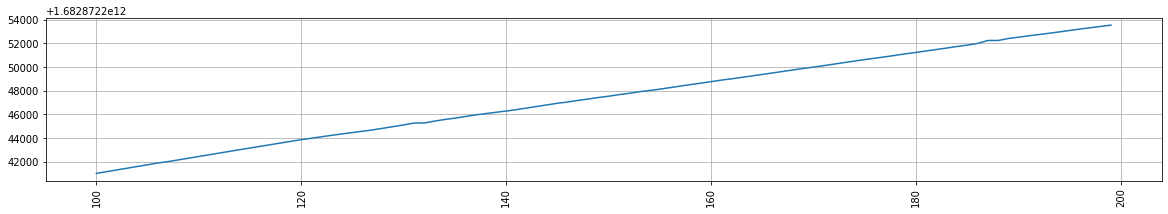

In [8]:
F = 100

plt.figure(figsize=(20, 3))
plt.plot(jf.iloc[F:F+100]['timeStamp'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

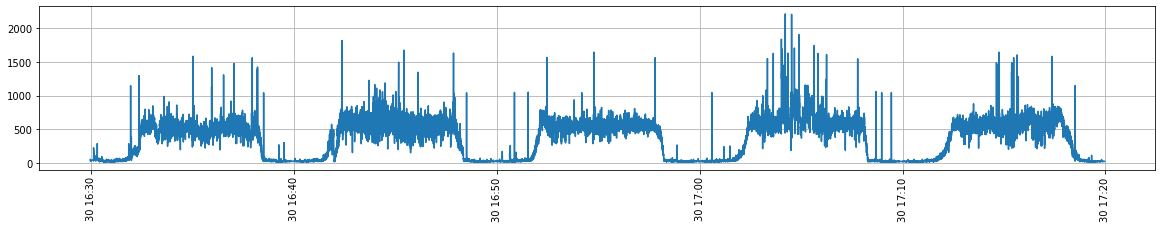

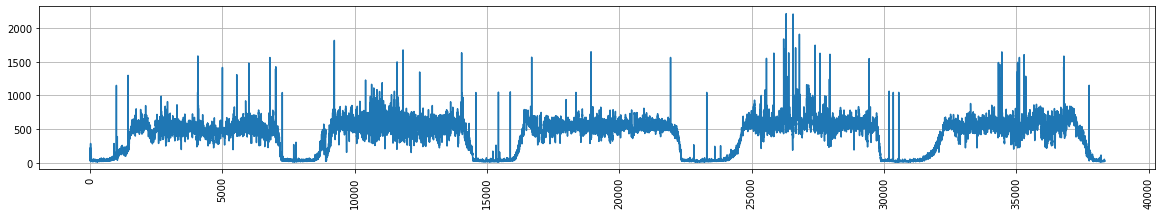

In [9]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

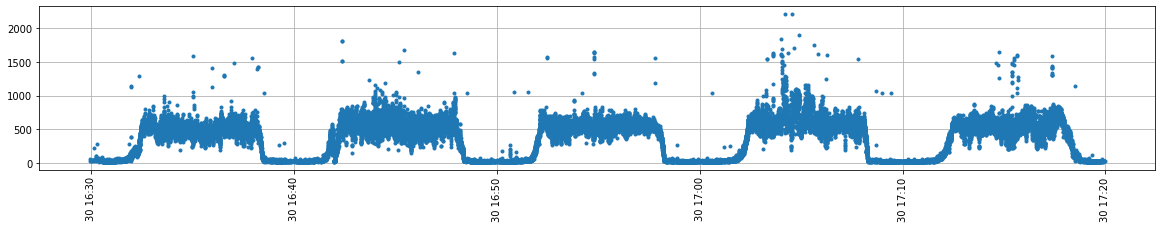

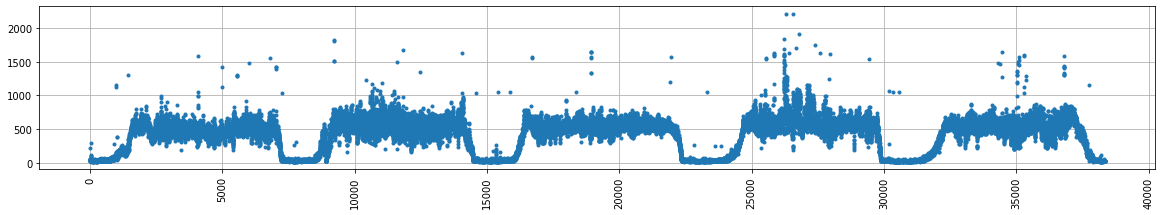

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [11]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

In [12]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


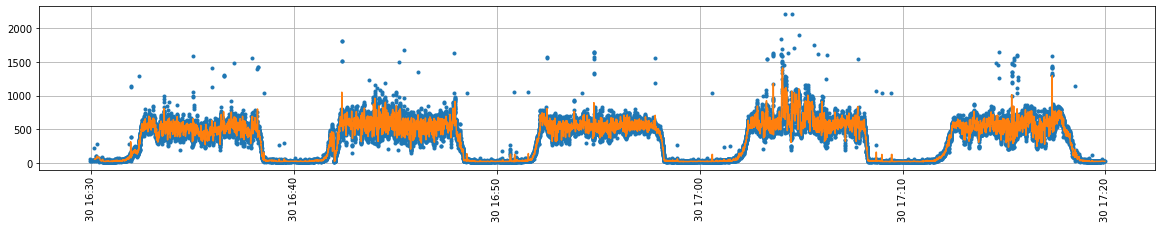

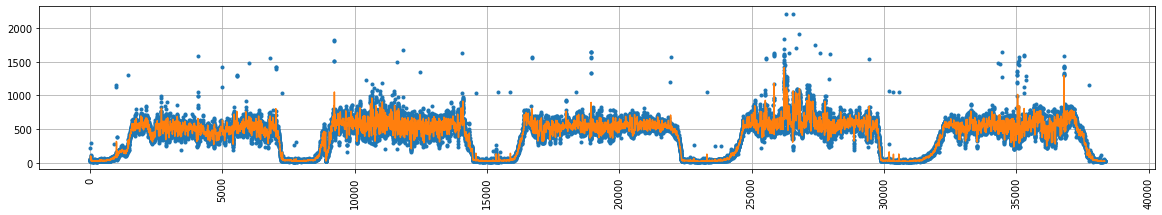

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [14]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
16    411.090348
17    426.478504
Name: Latency, dtype: float64

In [15]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
0      32.460177
1      54.743003
2     452.228891
3     578.581720
4     754.367816
5     633.210648
6     560.537566
7     582.531183
8     171.753036
9      30.348432
10     27.135294
11     57.236478
12    434.610287
13    528.347780
14    547.254777
15    520.496257
16    536.035545
17    631.850816
18    221.185286
19     30.197880
29     39.333333
30     35.153543
31     57.820933
32    392.667647
33    512.068520
34    509.438871
35    454.474396
36    522.599104
37    516.829571
38    245.586867
39     32.687719
40     31.478006
41    133.545710
42    528.646992
43    587.294118
44    601.459295
45    532.727064
46    519.948465
47    582.659841
48    151.958108
49     28.319298
50     37.677914
51     87.237047
52    529.018519
53    529.366768
54    549.227508
55    523.382000
56    558.438008
57    542.336663
58    117.370620
59     27.035336
Name: Latency, dtype: float64

In [16]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
16    29       39.333333
      30       35.153543
      31       57.820933
      32      392.667647
      33      512.068520
      34      509.438871
      35      454.474396
      36      522.599104
      37      516.829571
      38      245.586867
      39       32.687719
      40       31.478006
      41      133.545710
      42      528.646992
      43      587.294118
      44      601.459295
      45      532.727064
      46      519.948465
      47      582.659841
      48      151.958108
      49       28.319298
      50       37.677914
      51       87.237047
      52      529.018519
      53      529.366768
      54      549.227508
      55      523.382000
      56      558.438008
      57      542.336663
      58      117.370620
      59       27.035336
17    0        32.460177
      1        54.743003
      2       452.228891
      3       578.581720
      4       754.367816
      5       633.210648
      6       560.537566
      7       582.531183
      8       

In [17]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

56

In [18]:
jf['hour']   = jf['date'].map(lambda x : x.hour)
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [19]:
md = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [20]:
md

date  date  date
16    29    56      56.0
            57      32.0
            58      30.0
      30    0       43.0
            3       47.5
                    ... 
17    19    54      28.0
            55      29.0
            56      27.0
            57      27.0
            58      29.0
Name: Latency, Length: 2974, dtype: float64

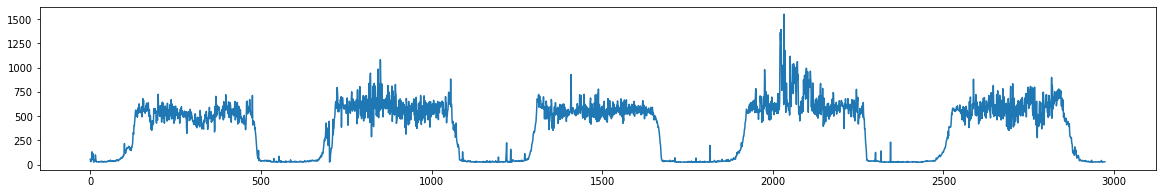

In [21]:
# Másodperc alapő válaszidő átlagok

plt.figure(figsize=(20, 3))
plt.plot(md.values)
plt.show()

In [22]:
_hours   = md.index.levels[0]
_minutes = md.index.levels[1]
_seconds = md.index.levels[2]

_hours_lowest =_hours.min()
_hours_highest = _hours.max()

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))
print(' hrs min %.1d hrs max %.1d' % (_hours_lowest, _hours_highest))

 sec min 0 sec max 59
 min min 0 min max 59
 hrs min 16 hrs max 17


In [23]:
tp = []

start_date = str(jf['date'].loc[0])[:11]

for _ in md.index:
    h = _[0]
    # h = str(_[0]).zfill(2)
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    s = str('%02d' % (_[2],))
    # print(h, m, s)
    tp.append(start_date + str(h) + ':' + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-04-30 16:29:56,56.0
1,2023-04-30 16:29:57,32.0
2,2023-04-30 16:29:58,30.0
3,2023-04-30 16:30:00,43.0
4,2023-04-30 16:30:03,47.5


In [24]:
mz = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  date  sec
16    29    5       39.333333
      30    0       68.000000
            1      100.714286
            2       40.764706
            3       34.526316
                      ...    
17    19    1       30.149254
            2       27.781818
            3       28.214286
            4       29.629630
            5       28.083333
Name: Latency, Length: 301, dtype: float64

In [25]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:11]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    h = _[0]
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    
    if c == 0:
        c += 1
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(_first_sec))
        print(tz)
    else:
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(s*10))
        
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

['2023-04-30 16:29:56']


,date,md
0,2023-04-30 16:29:56,39.333333
1,2023-04-30 16:30:00,68.000000
2,2023-04-30 16:30:10,100.714286
3,2023-04-30 16:30:20,40.764706
4,2023-04-30 16:30:30,34.526316


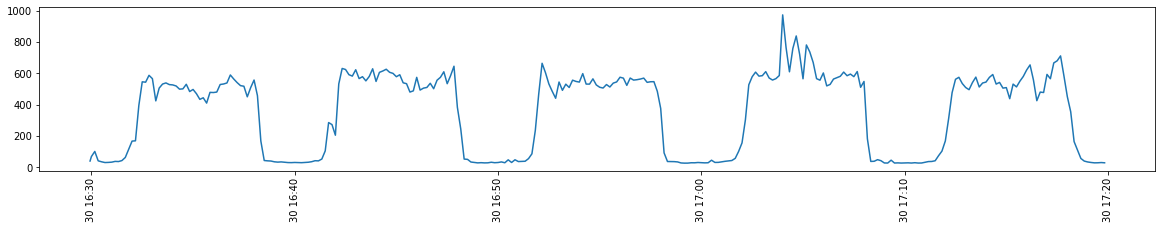

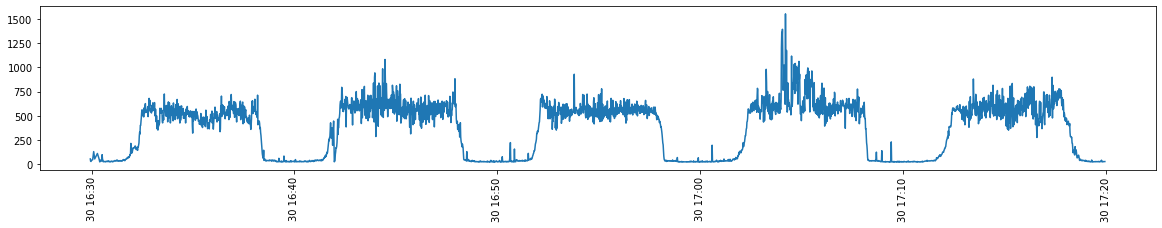

In [26]:
plt.figure(figsize=(20, 3))
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.figure(figsize=(20, 3))
plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [27]:
print(tp['date'][0])
print(tz['date'][0])

2023-04-30 16:29:56
2023-04-30 16:29:56


In [28]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

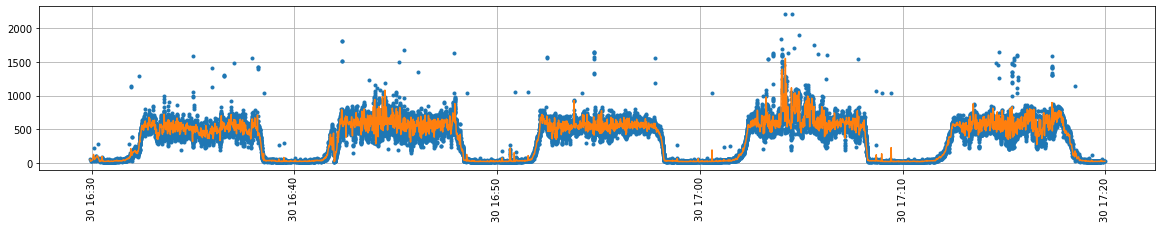

In [29]:
# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

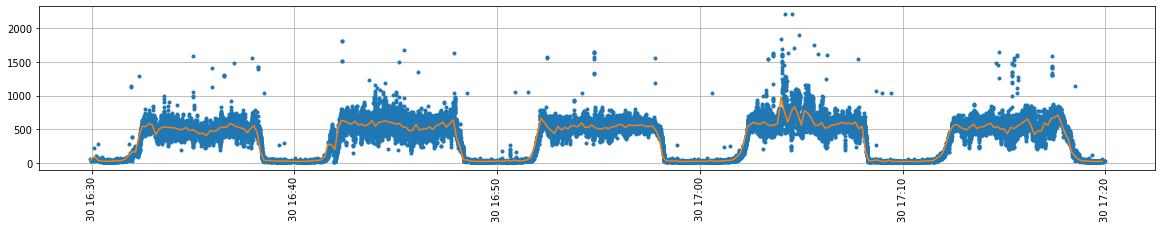

In [30]:
# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

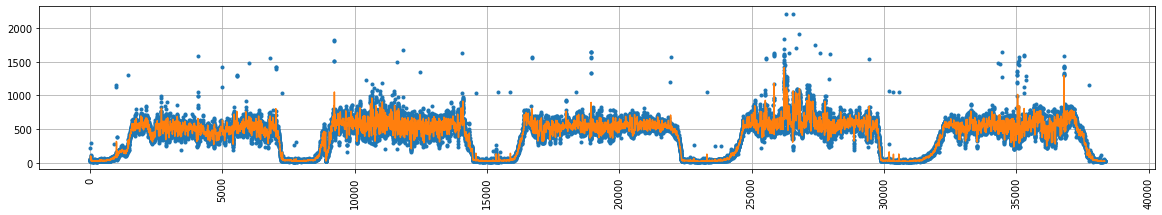

In [31]:
# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)

# Az erre helyezet 10-es mozgóátlag nem az elmúlt 10 mp hanem az utolsó 10 kérés válaszidejének átlaga
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

---

Most van az, hogy jól jönne a **Scaler.log** mert a **Metric.log** csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

A **Scaler.log**-ban csak a skálázáskor kiadott parancs időbélyege van eltárolva.

# Scaler.log - Metric.log - JMeter.log

In [32]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,16:30:04,16:30:0,124.1798,95.744000,1,0.3,8.7,69.2,13.7,...,0.0,23.7,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,16:30:15,16:30:1,242.1742,163.973778,2,0.9,7.7,89.1,9.6,...,0.0,15.5,15.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.170,16:30:24,16:30:2,461.6998,294.612571,3,0.7,15.3,78.4,19.9,...,0.0,21.1,20.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.170,16:30:31,16:30:3,347.2534,170.733176,2,1.7,13.3,82.1,17.7,...,0.0,37.4,36.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.170,16:30:41,16:30:4,191.2350,91.796368,1,5.7,16.3,79.1,19.8,...,0.0,168.4,166.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
jf[['date']].head(3)

,date
0,2023-04-30 16:29:56.786
1,2023-04-30 16:29:57.047
2,2023-04-30 16:29:58.790


In [34]:
df[['time']].head(3)

,time
0,16:30:0
1,16:30:1
2,16:30:2


In [35]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [36]:
scale_file_name = 'scaled_train_by_none.log'

sf = pd.read_csv(scale_file_name, sep=',', header=0)

display(sf.head(2))

,time,notification,actual_vm_number_was,actual_vm_number_is
0,16:30:04,Worker 192.168.0.116 added.,1,2
1,16:30:15,Worker 192.168.0.46 added.,2,3


In [37]:
print('Scaler.log')
print(sf['time'].iloc[0])
print(sf['time'].iloc[-1])
print(len(sf))

print('JMeter.log')
print(jf['date'].iloc[0])
print(jf['date'].iloc[-1])
print(len(jf))

Scaler.log
16:30:04
17:19:51
264
JMeter.log
2023-04-30 16:29:56.786000
2023-04-30 17:19:58
38344


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [38]:
jf['date']

0       2023-04-30 16:29:56.786
1       2023-04-30 16:29:57.047
2       2023-04-30 16:29:58.790
3       2023-04-30 16:30:00.792
4       2023-04-30 16:30:00.792
                  ...          
38339   2023-04-30 17:19:54.561
38340   2023-04-30 17:19:55.355
38341   2023-04-30 17:19:56.241
38342   2023-04-30 17:19:57.243
38343   2023-04-30 17:19:58.000
Name: date, Length: 38344, dtype: datetime64[ns]

In [39]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0      16:30:04
1      16:30:15
2      16:30:24
3      16:30:31
4      16:30:41
         ...   
259    17:19:11
260    17:19:21
261    17:19:31
262    17:19:41
263    17:19:51
Name: time, Length: 264, dtype: object

In [40]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '
print(start_date)

sf['date'] = start_date + sf['time']
sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-04-30 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,16:30:04,Worker 192.168.0.116 added.,1,2,2023-04-30 16:30:04
1,16:30:15,Worker 192.168.0.46 added.,2,3,2023-04-30 16:30:15
2,16:30:24,Worker 192.168.0.116 removed.,3,2,2023-04-30 16:30:24


In [41]:
sf['date']

0     2023-04-30 16:30:04
1     2023-04-30 16:30:15
2     2023-04-30 16:30:24
3     2023-04-30 16:30:31
4     2023-04-30 16:30:41
              ...        
259   2023-04-30 17:19:11
260   2023-04-30 17:19:21
261   2023-04-30 17:19:31
262   2023-04-30 17:19:41
263   2023-04-30 17:19:51
Name: date, Length: 264, dtype: datetime64[ns]

In [42]:
jf['date']

0       2023-04-30 16:29:56.786
1       2023-04-30 16:29:57.047
2       2023-04-30 16:29:58.790
3       2023-04-30 16:30:00.792
4       2023-04-30 16:30:00.792
                  ...          
38339   2023-04-30 17:19:54.561
38340   2023-04-30 17:19:55.355
38341   2023-04-30 17:19:56.241
38342   2023-04-30 17:19:57.243
38343   2023-04-30 17:19:58.000
Name: date, Length: 38344, dtype: datetime64[ns]

In [43]:
jf['date'].iloc[3]

Timestamp('2023-04-30 16:30:00.792000')

In [44]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [45]:
jf['dates'].iloc[3]

Timestamp('2023-04-30 16:30:00')

In [46]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

# Sajnos ez a megoldás ezen az adatbázison nem lesz jó

# -----------------------------------------------------


# Bár most azok után, hogy rendeztem az adatokat a time
# szerint már lehet, hogy jó lesz


_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in track(range(jf['Latency'].shape[0])):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]
    
    if c < len(sf):
        if jf_date == _current_scale_date:
            # print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
5


# Kiegészítés

Itt akadtam meg már a 26,25,24-ben lefutott erre it megkadat az algoritmus,
ami a JMeter.csv és a Scaler.log alapján a JMeter.csv-hez rendeli a megfelelő
időpontban a megfelelő Worker számokat.

Az algo azért akad meg, mert van egy pont amikor skálázás volt a Scaler.log
timestamp alapján viszont abban az időpontban a JMeter.log nem rögzített értéket
ezért azon a ponton eltörik az algo.

    14 	06:54:30 	Worker 192.168.0.192 removed. 	3 	2 	2023-05-20 06:54:30
    15 	06:54:41 	Worker 192.168.0.220 removed. 	2 	1 	2023-05-20 06:54:41
    16 	06:54:57 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 06:54:57
    17 	06:54:57 	Worker 192.168.0.91 added. 	2 	3 	2023-05-20 06:54:57
    18 	06:54:57 	Worker 192.168.0.93 added. 	3 	4 	2023-05-20 06:54:57
    
valhol itt.

In [47]:
# Van e bárhol ilyen dátum?

answer = []
where = []

for date in sf['date']:
    # print(date)
    # found = (jf['dates'] == '2023-05-21 09:22:03').any(axis=0)
    found = (jf['dates'] == date).any(axis=0)
    answer.append(found)
    if found == False:
        where.append(date)

# print(set(answer))

print('Azok az Scaler.log dátumok amelyek nincsenek benne JMeter.log-ban:')
for _ in where: print(_)

Azok az Scaler.log dátumok amelyek nincsenek benne JMeter.log-ban:
2023-04-30 16:30:04
2023-04-30 16:30:15


In [48]:
default = {
    'timeStamp': np.nan,
    'elapsed': np.nan,
    'label': '',
    'responseCode': np.nan,
    'responseMessage': np.nan,
    'threadName': '',
    'dataType': '',
    'success': False,
    'failureMessage': np.nan,
    'bytes': np.nan,
    'sentBytes': np.nan,
    'grpThreads': np.nan,
    'allThreads': np.nan,
    'URL': '',
    'Latency': np.nan,
    'IdleTime': np.nan,
    'bytes': np.nan,
    'Connect': np.nan,
    'RT_LIMIT_UPPER': np.nan,
    'RT_LIMIT_LOWER': np.nan,
    'date': '',                   # ez lesz majd beszúrva datetime64[ns]
    '_x': np.nan,
    'ma10rt': np.nan,
    'hour': np.nan,
    'minute': np.nan,
    'second': np.nan,
    'sec': np.nan,
    'dates': '',                  # ez lesz madj beszúrva datetime64[ns]
    'sf_vm': np.nan,              # ez lesz majd beszúva (int64)
}


af = jf.copy()

# for _ in af.columns:
#     print(_, af[_].dtype)
    

    # Tehát a feladat az, hogy végig iteráljak az 'Scaler.log' on és ha olyan dátum van ami nincs benne a
    # JMeter.log-ban akkor azt egyem bele

for missing_date in where:
    print(missing_date)
    d = missing_date
    
    # Fölösleges mivel a missing_date már elefe datetime object
    # d = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')

    row = {'date': d, 'dates': d}

    af = af.append({**default, **row}, ignore_index=True)

# Mivel az új dátumok a DataFrame végére kerülnek ezért ismét rendezni kell őket (date és timeStamp alapján)
#  vagy egyszerűen a date alapján mert az lett konvertálva a timeStampből és örzi a milisec információkat is

af = af.sort_values(by='date', ignore_index=True)

af = af.reset_index(drop=True)

af.head(3)


2023-04-30 16:30:04
2023-04-30 16:30:15


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1.682872e+12,256.0,HTTP Request,200.0,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230.0,...,200.0,2023-04-30 16:29:56.786,0.0,NaN,16.0,29.0,56.0,5.0,2023-04-30 16:29:56,1.0
1,1.682872e+12,188.0,HTTP Request,200.0,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230.0,...,200.0,2023-04-30 16:29:57.047,1.0,NaN,16.0,29.0,57.0,5.0,2023-04-30 16:29:57,1.0
2,1.682872e+12,147.0,HTTP Request,200.0,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-3,text,True,NaN,200230.0,...,200.0,2023-04-30 16:29:58.790,2.0,NaN,16.0,29.0,58.0,5.0,2023-04-30 16:29:58,1.0


In [49]:
# Van e bárhol ilyen dátum de most az af-ben, elvileg kéne, hogy legyen

for _ in sf['date'].iloc[-10:]:
    res_af = (af['dates'] == _).any(axis=0) # itt vann, hogy melyik dátum az ami nincs a sf-ben
    res_jf = (jf['dates'] == _).any(axis=0) # itt vann, hogy melyik dátum az ami nincs a jf-ben
    print(_, res_af, res_jf)

2023-04-30 17:18:21 True True
2023-04-30 17:18:31 True True
2023-04-30 17:18:41 True True
2023-04-30 17:18:51 True True
2023-04-30 17:19:01 True True
2023-04-30 17:19:11 True True
2023-04-30 17:19:21 True True
2023-04-30 17:19:31 True True
2023-04-30 17:19:41 True True
2023-04-30 17:19:51 True True


In [50]:
print(len(af))
print(len(jf))

38346
38344


In [51]:
# Van e bárhol ilyen dátum?

(af['dates'] == '2023-05-07 20:08:33').any(axis=0)

False

## Kurva jó lenne rájönnöm, hogy hol a faszba csúszik el ez a geci

    # meg van, hogy hol a hiba ha egy jf időpontból csak egy van de a hozzá tartozó sf időpotnból több
    # mert abban az időpontban több vm-et is hozzáadott, akkor az sf-be azonos idővel került be
    # akkor a következő körben már tovább ugrik a következő jf-re és lehet hogy az ahhoz tartozó
    # időpont már nem azonos a következő sf időponttal ezért soha többé nem teljesül az af_date == _current_date
    # feltétel,
    # Ezért amikor ez a feltétel elöször teljesül
    # akkor végig kell iterálni az sf-en annyiszor amig új időpontot nem érzékel az sf-ben

In [52]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)
print(_len_sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

print(_first_scale_date)
print(_current_scale_date)

print(af['date'].iloc[0])
print(af['dates'].iloc[0])

af['sf_vm'] = -1

c = 0

print(af['Latency'].shape[0])

for i in track(range(af['Latency'].shape[0])):
    af['sf_vm'].iloc[i] = _current_vm_number

    af_date = af['dates'].iloc[i]
    
    if c < len(sf):
        if af_date == _current_scale_date:
            # print('    Scale', af_date, _current_scale_date, _current_vm_number, i, c)
            # print('-', af_date, '-')
            # print('+', _current_scale_date, '+')
            # print('v', _current_vm_number, 'v')
            # print('c', c, 'c')
            # print('i', i, 'i')
            # addig iteráljon amig asz sf dátuma nem változk, akkor álta át a _current_scale_date-t
            
            u = True
            while u == True:
                
                if c + 1 >= len(sf):
                    break
                
                if c + 1 < len(sf):
                    # olvassa ki az sf[c]-hez tartozó dátumot (de ne most)

                    # olvassa ki a vm_numbert
                    _current_vm_number = sf['actual_vm_number_is'].iloc[c]

                    #
                    if sf['date'].iloc[c] != sf['date'].iloc[c + 1]:
                        u = False
                        _current_scale_date = sf['date'].iloc[c + 1]

                    c += 1
                    # print(c)
                    # print(i)
            


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
5
264
2023-04-30 16:30:04
2023-04-30 16:30:04
2023-04-30 16:29:56.786000
2023-04-30 16:29:56
38346


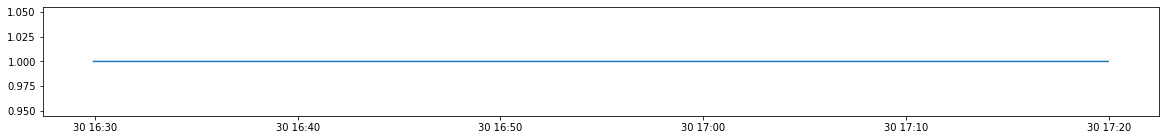

In [53]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

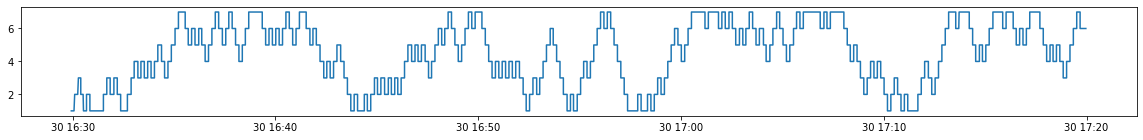

In [54]:
# Dátum alapján rendezet af

plt.figure(figsize=(20,2))
plt.plot(af['dates'], af['sf_vm'])
plt.show()

In [55]:
sf.iloc[10:20].head(100)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
10,16:32:12,Worker 192.168.0.116 removed.,3,2,2023-04-30 16:32:12
11,16:32:22,Worker 192.168.0.46 removed.,2,1,2023-04-30 16:32:22
12,16:32:42,Worker 192.168.0.116 added.,1,2,2023-04-30 16:32:42
13,16:32:53,Worker 192.168.0.46 added.,2,3,2023-04-30 16:32:53
14,16:33:02,Worker 192.168.0.219 added.,3,4,2023-04-30 16:33:02
15,16:33:13,Worker 192.168.0.116 removed.,4,3,2023-04-30 16:33:13
16,16:33:22,Worker 192.168.0.116 added.,3,4,2023-04-30 16:33:22
17,16:33:32,Worker 192.168.0.116 removed.,4,3,2023-04-30 16:33:32
18,16:33:42,Worker 192.168.0.116 added.,3,4,2023-04-30 16:33:42
19,16:33:52,Worker 192.168.0.116 removed.,4,3,2023-04-30 16:33:52


<h2> <font color="red">Vannak durva anomáliák</font> </h2>

Például ez hogy lehetséges?

    154 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01
    155 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01

Bele néztem a train_by_none.py kódba is és nem tudom az okát

---

Amúgy érdkes, hogy milyen időpontokban ad hozzá, vesz el vm-ket.

Megnéztem a programot amit írtam és akkor kerül bele a **Scale.log** filébe a bejegyzés és az időbélyeg,
amikor kiadta a skálázási parancsot.

Ez az esetek többségében 10-ik másodperc valahányszorosa.

Nem elfelejteni, hogy a tanulóadatok előállításánál nincs semmilyen számátás ami miatt késne a rendszer.

Ezért az a gyanúm, hogy a tényleges skálázásnál ez már nem így lesz.

Ennek ellenére látok néhány adatot amikor példul

    92 	09:33:50 	Worker 192.168.0.73 removed.
    93 	09:34:02 	Worker 192.168.0.73 added.

Nem teljesen értem, hogy a faszba fordulhatott elő, hogy két máodperc múlva is meg lett hívva ez az eljárás.

Ezért ennek most egy picit utána nézek.

## Sajnos meg is fejtettem az okát.

Ugye amikor túl van terhelve a rendszer akkor később érkezik be egy válaszidő ezért és mivel az egész rendszer akkor triggerelődik amikor bejön egy válaszidő ezért van ez a csúszkálás.

Ez megoldódna ha minden 10-ik másodpercben lefutna a rendszer de jelenleg nem így működik, és most még nem is foglalkozom vele, hogy átírjam a rendszert.

In [56]:
sf_second = sf['date'].dt.second

np.unique(sf_second, return_counts=True)

(array([ 1,  2,  3,  4, 11, 12, 13, 15, 21, 22, 23, 24, 31, 32, 33, 34, 41,
        42, 43, 51, 52, 53]),
 array([13, 25,  5,  2, 13, 24,  6,  1, 15, 15, 12,  1, 18, 15,  8,  1, 17,
        22,  5, 18, 20,  8]))

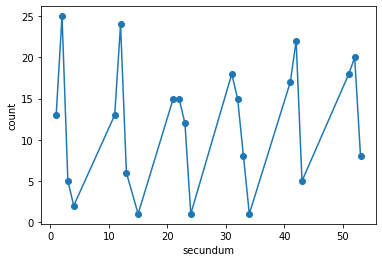

In [57]:
_ = np.unique(sf_second, return_counts=True)

plt.scatter(_[0], _[1])
plt.plot(_[0], _[1])
plt.xlabel('secundum')
plt.ylabel('count')
plt.show()

# többségében 10 valahányszorosára jön ki a skálázás, de sok olyan eset is van amikor nem.

In [58]:
# Van e bárhol ilyen dátum?

(jf['dates'] == '2023-05-21 09:22:03').any(axis=0)

False

In [59]:
jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1682872196786,256,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,...,200,2023-04-30 16:29:56.786,0,NaN,16,29,56,5,2023-04-30 16:29:56,1
1,1682872197047,188,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,200230,...,200,2023-04-30 16:29:57.047,1,NaN,16,29,57,5,2023-04-30 16:29:57,1
2,1682872198790,147,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-3,text,True,NaN,200230,...,200,2023-04-30 16:29:58.790,2,NaN,16,29,58,5,2023-04-30 16:29:58,1


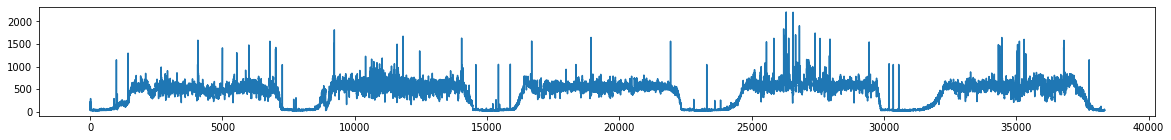

In [60]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['Latency'])
plt.show()

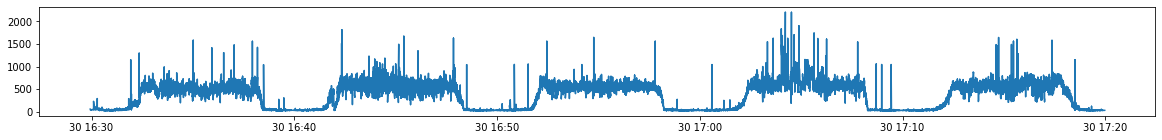

In [61]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['Latency'])
plt.show()

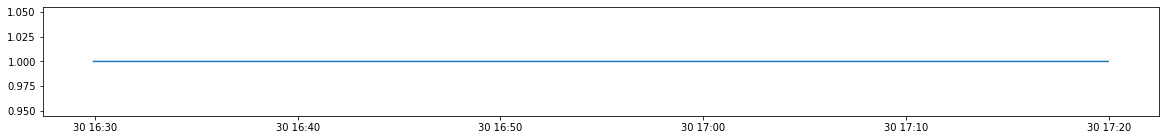

In [62]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

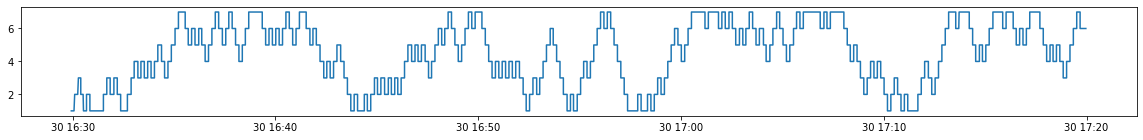

In [63]:
# Dátum alapján rendezet af

plt.figure(figsize=(20,2))
plt.plot(af['dates'], af['sf_vm'])
plt.show()

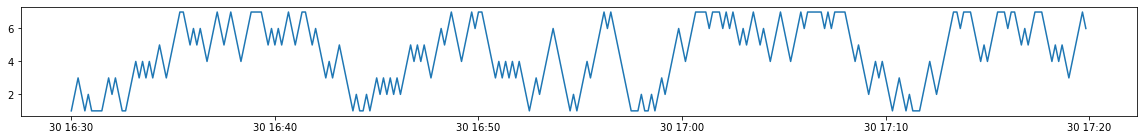

In [64]:
# Metric.log-ból kiolvasott VM Number

plt.figure(figsize=(20,2))
plt.plot(df['nntime'], df['worker_number'])
plt.show()

In [65]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


## Ezt feljebb már megcsináltam

De most itt hagyom mert csak plottolás

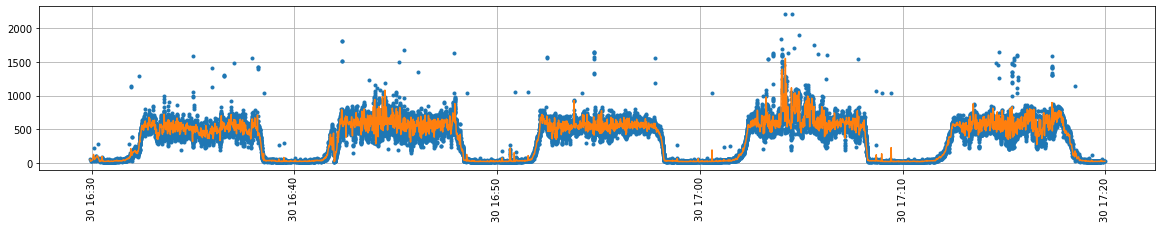

In [66]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Ezen dolgoztam

Hogy a JMeter.log és a Metric.log vagyis Scale.log wm_number egy df-be és egy ábrára kerüljenek.

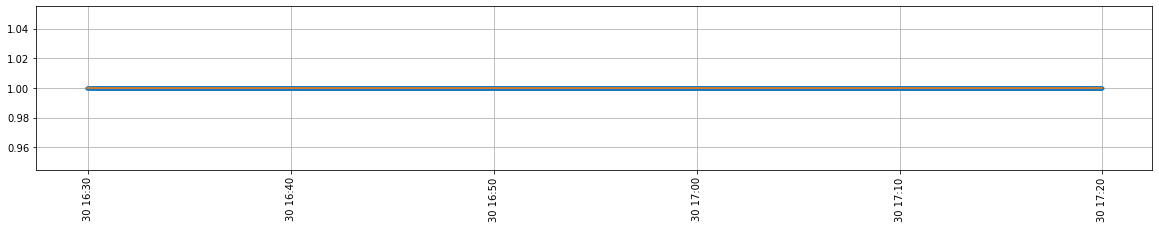

In [67]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

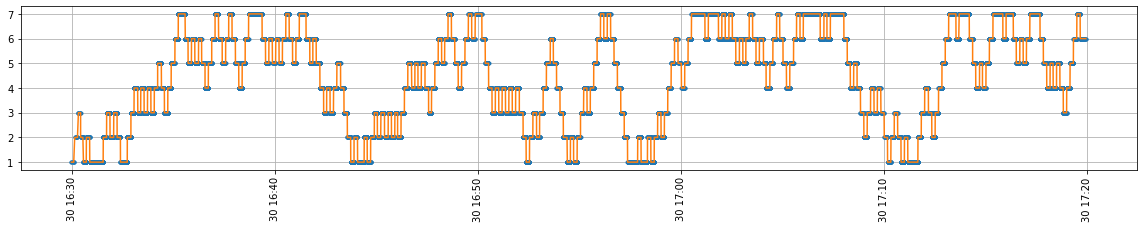

In [68]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
plt.plot(af['date'], af['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [69]:
# Ellenőrzés (felületes)

sf.tail(5)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
259,17:19:11,Worker 192.168.0.46 added.,4,5,2023-04-30 17:19:11
260,17:19:21,Worker 192.168.0.219 added.,5,6,2023-04-30 17:19:21
261,17:19:31,Worker 192.168.0.233 added.,6,7,2023-04-30 17:19:31
262,17:19:41,Worker 192.168.0.116 removed.,7,6,2023-04-30 17:19:41
263,17:19:51,Worker 192.168.0.46 removed.,6,5,2023-04-30 17:19:51


## Ezen dolgoztam

A két logfiléből kinyert adat együtt - JMeter.log és Scale.log vm_number

**tp\['date'\]** és **tp\['md'\]** a JMeter.log-ból számolt másodpercekre lebontott átlagú **Latency** a JMetric.log-ból.

**jf\['date'\]** és **jf\['sf_vm'\]** a Scaler.log alapján a JMeter df-be létrehozott **Worker Number**

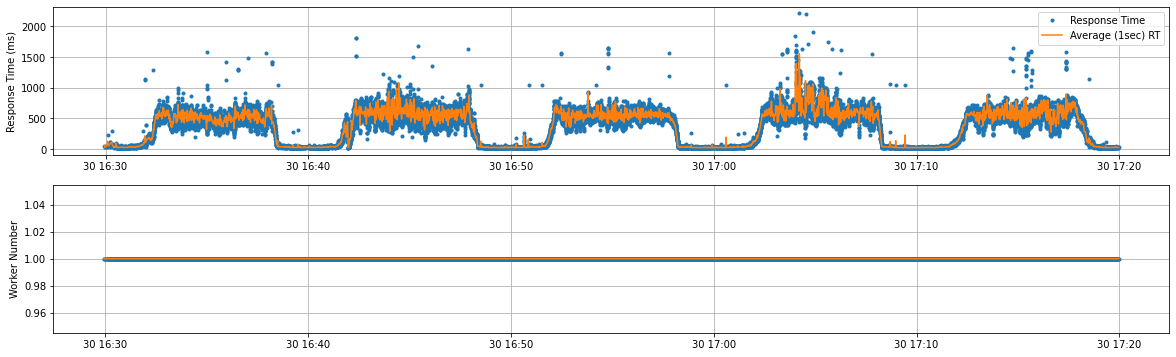

In [70]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

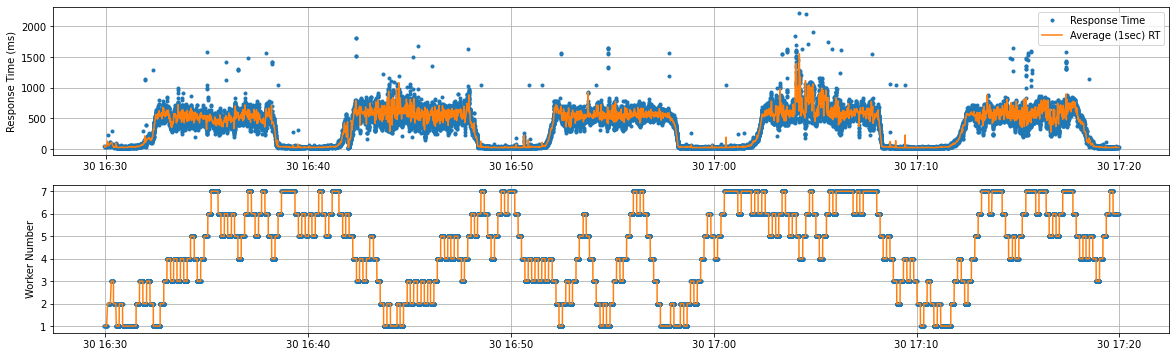

In [71]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(af['date'], af['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
ax1.plot(af['date'], af['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## A jf alapján meg lehet nézni mindkét API-t

A jf alapján meg lehet nézni mindkét API-t?

In [72]:
jf['label'].unique()

array(['HTTP Request'], dtype=object)

## JMeter.log alapján

A két REST API 10 másodpercenként mért átlagos válaszideje - a **JMeter.csv** alapján.

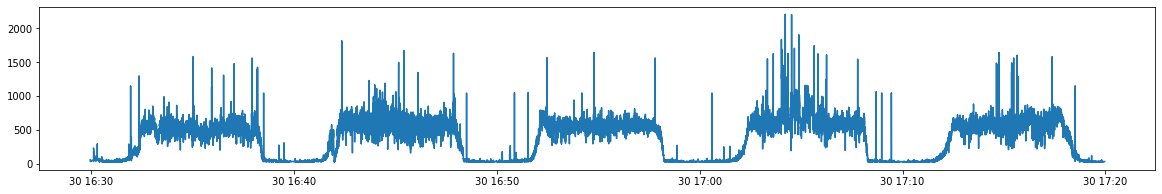

In [73]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.show()

## JMeter.log és Scaler.log alapján

Mellé teszem a **Scaler.log** alapján kinyert **worker_number** válotzót is.

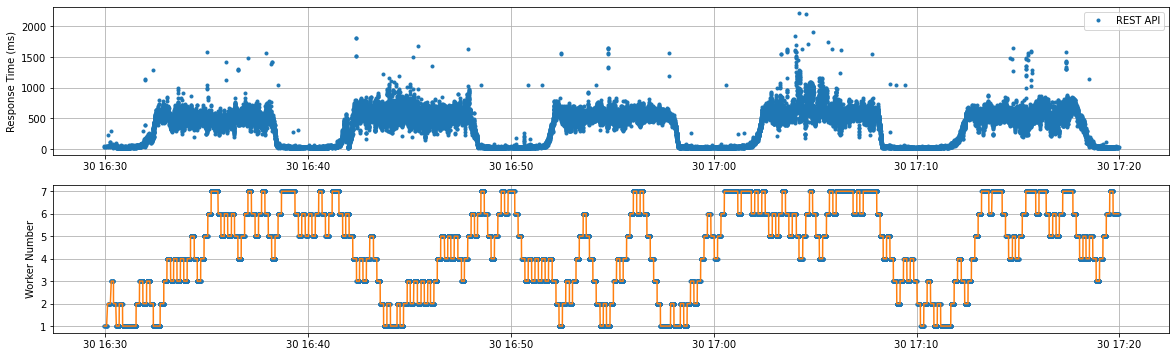

In [74]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='REST API')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
ax1.plot(af['date'], af['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test26 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

## Fontos

Ami itt kövektezik, az nem lehet annyira pontos mint a JMeter.log és a Scaler.log alapján összerakott megoldás.

**Miért?**

Mert a Metric.log filokban a MyLog.log fileből és az Access.log-ból kinyert és 10 másodpercre aggregált átlagok vannak.

**Megjegyzés:**

A **Metric.log** fájlba az idő **HH:MM:S** formátumba kerül. Ezért még hozzá kell adnom az **Y-m-d** adatot és egy **0**-t a **s** mögé.

Azt viszont, hogy mi volt az **Év-Hónap-Nap** a **Metric.log** filéből nem lehet megtudni, de ha rendesen tároltam el a teszt mérési eredményket akkor a könyvtárban ott van a **JMeter.csv** file is amiben viszont benne van a dátum.

Ha egy mérés nem csúszik át egyik napból a másikba akkor egyszerűen ki lehet olvani a **JMeter.csv** file első sorából a dátumot és azt beilleszteni a **Metric.log** adataiba.

Egyszerűbb lett volna, ha a **Metric.log** készítésénél beillesztem a dátumot is amikor a mérés zajlik de most már így alakult és nem fogok 26 mérést újra csinálni.

In [75]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


## Csak a Metric.log alapján

Ennél a megoldásnál jobb az amelyiket a **JMeter.csv** és a **Scaler.log** alapján raktam össze, mert sokkal nagyobb a felbontása (kérés alapú, vagy másodperc alapú)

De mivel a metrikákat és a tényleges döntéseket is ez alapján hozza meg az optimizer ezért látni akarom ezt is.

Itt viszont REST API-ra szétbontva nézem meg a válaszidő és a virtuális gépek számának alakulását a tisztán a **Metric.log** alapján.

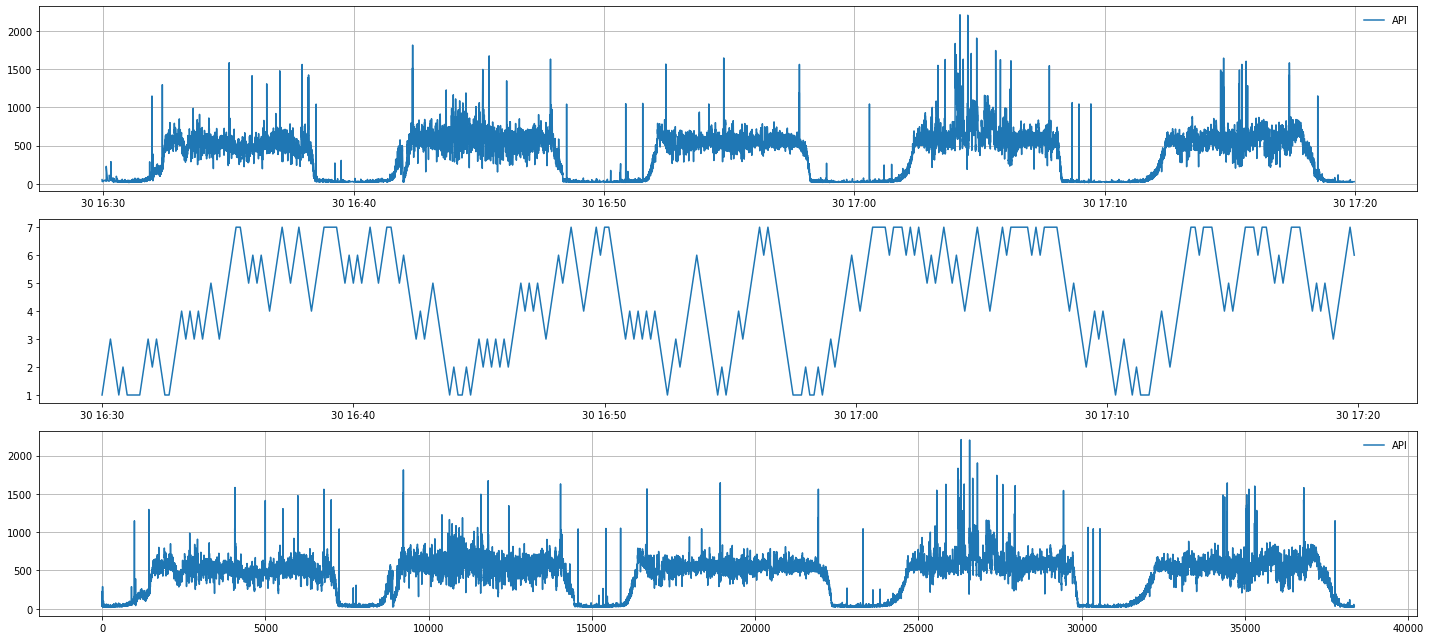

In [76]:
# Teljesen jó,

# ---

# Kiegészítés

# Azért ez még mindíg nem tökéletes

# Az igazi az lenne ha a scaler.log-ból olvasnám ki, hogy mikor volt skálázás és azt tenném rá.


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(jf['date'], jf['Latency'], marker=marker, linewidth=linewidth, label='API')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(jf['Latency'], marker=marker, linewidth=linewidth, label='API')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

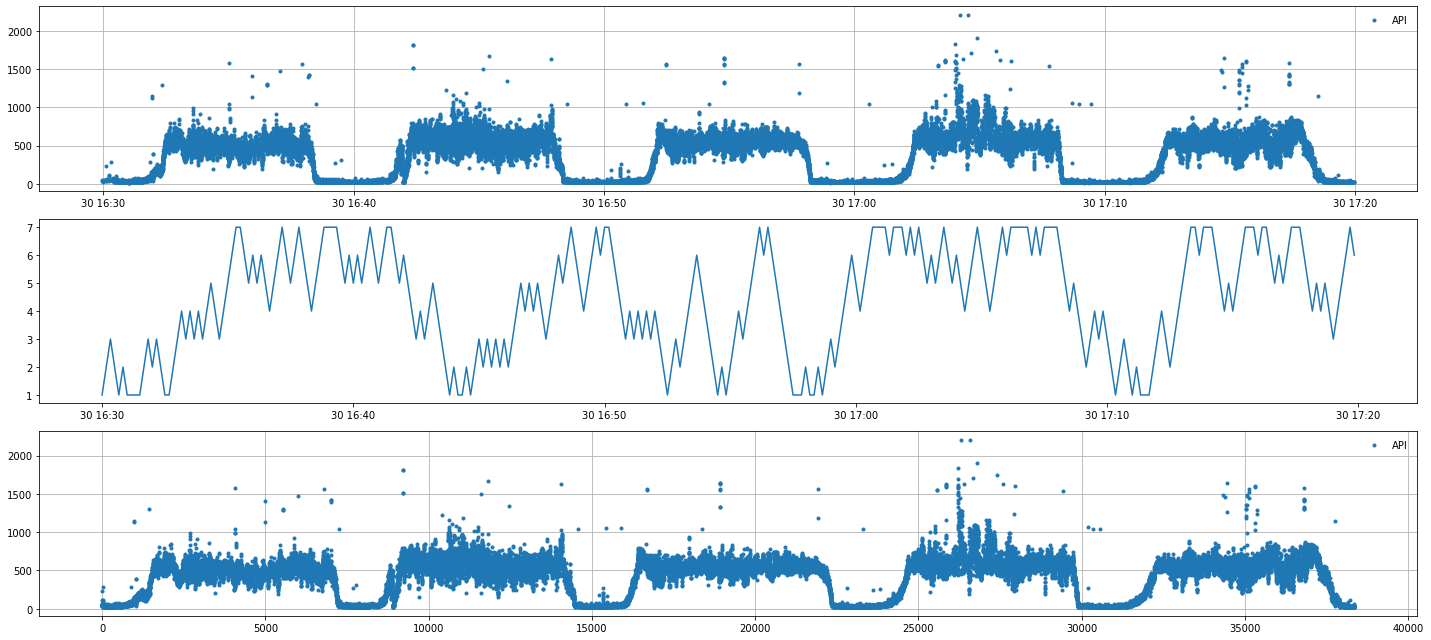

In [77]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [83]:
start_date = '2023-04-30 01:00'
end_date = '2023-04-30 17:50'

mask = (jf['date'] > start_date) & (jf['date'] <= end_date)
J = jf.loc[mask]

J.shape

(38344, 28)

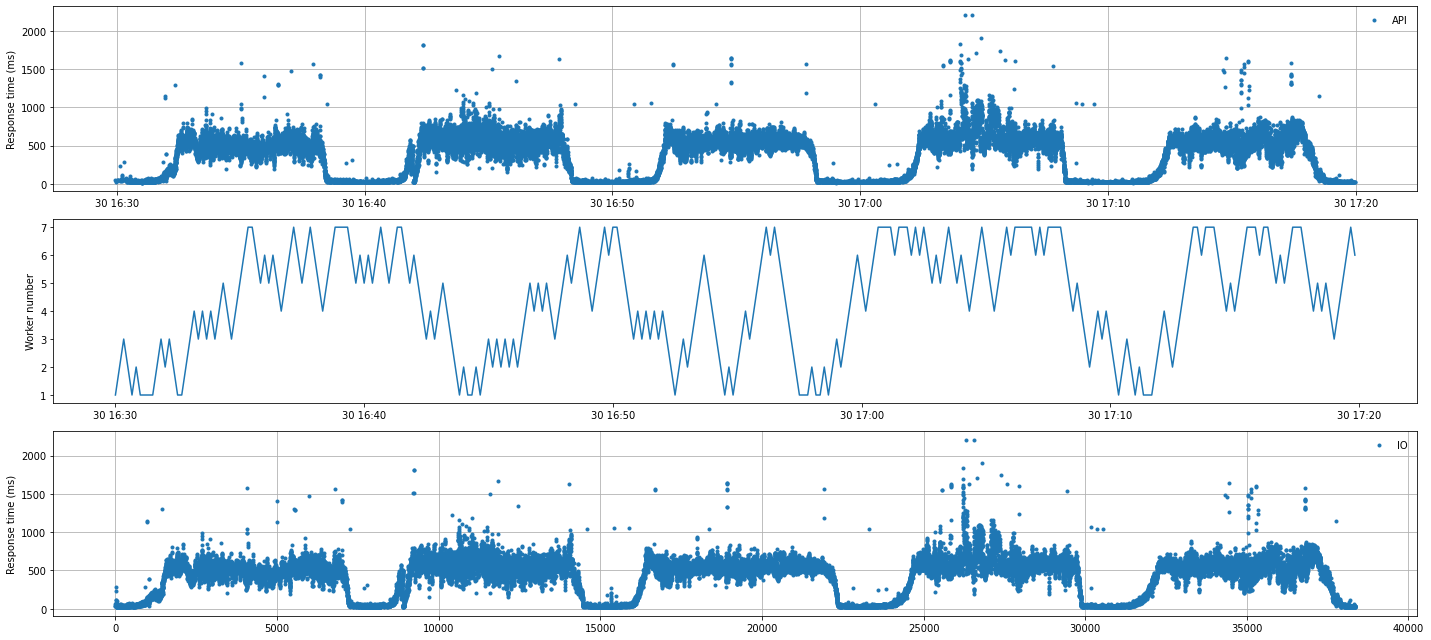

In [84]:
def zoom(start_date, end_date):

    mask = (jf['date'] > start_date) & (jf['date'] <= end_date)
    J = jf.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(J['date'], J['Latency'], marker='.', linewidth=0, label='API')
    ax0.set_ylabel('Response time (ms)')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.set_ylabel('Worker number')
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(J['Latency'], marker='.', linewidth=0, label='IO')
    ax2.set_ylabel('Response time (ms)')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-04-30 01:00', '2023-04-30 17:50')

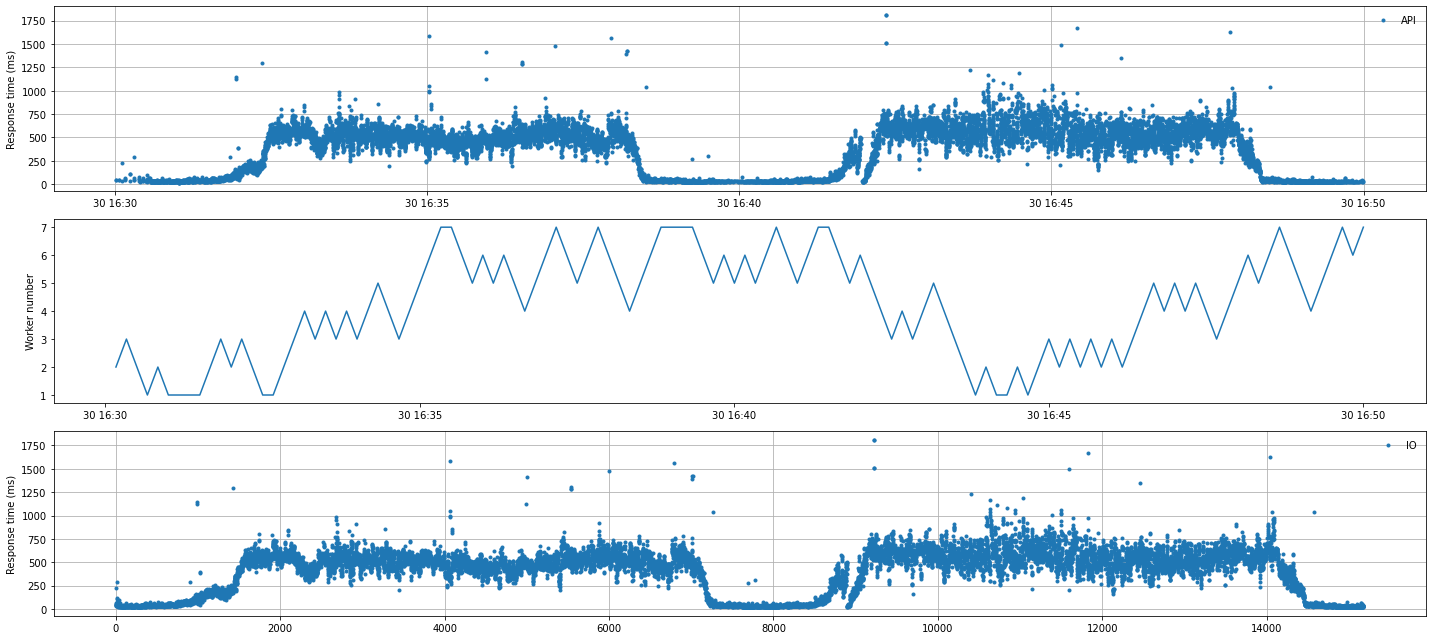

In [86]:
zoom('2023-04-30 16:30', '2023-04-30 16:50')

## Helpers

In [81]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)


<class 'datetime.datetime'>
2023-05-17 13:55:26
